In [1]:
from sklearn.cluster import KMeans
from semi_supervised_clustering import *
from semi_supervised_gmm import *

In [2]:
x_train, y_train, x_test, y_test = mnist_data(categorical=True)
Method = SemiSupervisedGMM
rounds = 5

In [7]:
accs = []
percentages = [0.02, 0.05, 0.1, 0.2, 0.5]
for percentage in tqdm(percentages, desc=">> percentages"):
    accs_round = []
    for _ in range(rounds):
        labeled_data, labeled_labels, unlabeled_data, unlabeled_labels = prepare_labeled_data(x_train, y_train,
                                                                                              percentage=percentage)
        X = np.concatenate((labeled_data, unlabeled_data), axis=0)
        label_assignments = list(labeled_labels) + list(unlabeled_labels)

        # print(X.shape)
        # print(len(labeled_data), len(labeled_labels))
        # print(set(labeled_labels), set(y_train))

        # clustering
        ssgmm = Method(n_components=10)
        ssgmm.fit(X, labeled_data, labeled_labels)
        cluster_assignments = ssgmm.predict(X)
        centroids = ssgmm.centroids

        # Method.scatter_cluster_points_with_labeled(X, label_assignments, cluster_assignments, n_labeled=len(labeled_labels))
        accs_round.append(clustering_accuracy(label_assignments, cluster_assignments))
    accs.append(accs_round)

>> percentages:   0%|          | 0/5 [00:00<?, ?it/s]

120 120
120 120
120 120
120 120
120 120


>> percentages:  20%|██        | 1/5 [00:06<00:27,  6.84s/it]

300 300
300 300
300 300
300 300
300 300


>> percentages:  40%|████      | 2/5 [00:12<00:19,  6.52s/it]

600 600
600 600
600 600
600 600
600 600


>> percentages:  60%|██████    | 3/5 [00:18<00:12,  6.41s/it]

1200 1200
1200 1200
1200 1200
1200 1200
1200 1200


>> percentages:  80%|████████  | 4/5 [00:29<00:07,  7.57s/it]

3000 3000
3000 3000
3000 3000
3000 3000
3000 3000


>> percentages: 100%|██████████| 5/5 [00:37<00:00,  7.50s/it]


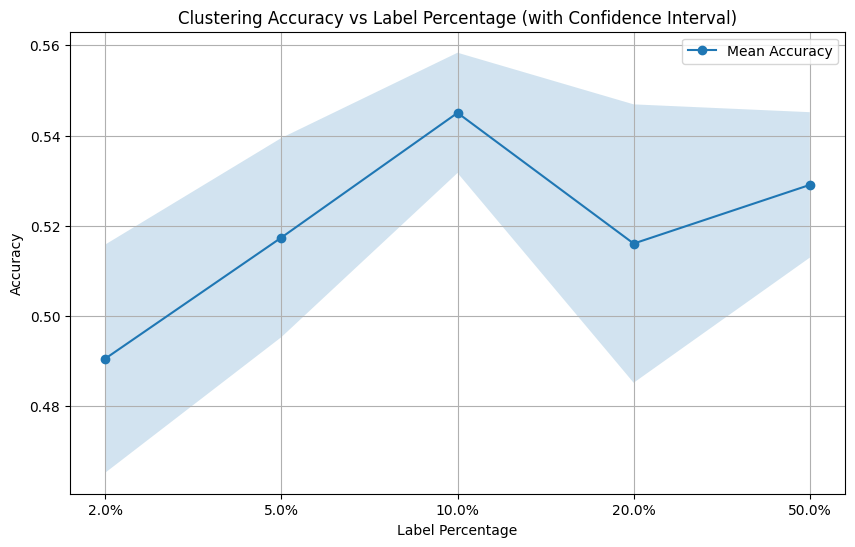

In [8]:
plot_clustering_accs(accs, percentages)